In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime
import csv

In [4]:
fed_rates = pd.read_csv("Resources/FEDFUNDS.csv")
# header_names=['Date','MORTGAGE30US']
# Morgate_rate_df = pd.read_csv("Resources/Mortage_rate_30_Years.csv",header=None,skiprows=1, names=header_names)
# Morgate_rate_df
fed_rates

,DATE,FEDFUNDS
0,2019-01-01,2.40
1,2019-02-01,2.40
2,2019-03-01,2.41
3,2019-04-01,2.42
4,2019-05-01,2.39
...,...,...
60,2024-01-01,5.33
61,2024-02-01,5.33
62,2024-03-01,5.33
63,2024-04-01,5.33


In [7]:
fed_rates["DATE"] = pd.to_datetime(fed_rates["DATE"])
fed_rates

,DATE,FEDFUNDS
0,2019-01-01,2.40
1,2019-02-01,2.40
2,2019-03-01,2.41
3,2019-04-01,2.42
4,2019-05-01,2.39
...,...,...
60,2024-01-01,5.33
61,2024-02-01,5.33
62,2024-03-01,5.33
63,2024-04-01,5.33


In [8]:
#Write new CSV to repo
fed_rates.to_csv("fed_rates.csv", index=False, header=True)

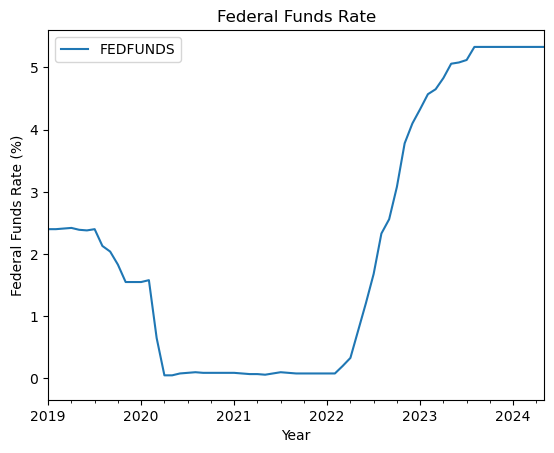

In [13]:
import scipy.stats as st
from scipy.stats import linregress
import matplotlib.pyplot as plt

fed_rates.plot(x="DATE", y="FEDFUNDS", xlabel="Year",
         ylabel="Federal Funds Rate (%)", title="Federal Funds Rate")

#Set tickmarks to years
# x1=[0,11,23,35,47,59]
# labels = [2019, 2020, 2021, 2022, 2023, 2024]
# plt.xticks(x1, labels,rotation=45)

# Calculate the correlation coefficient and a linear regression model 
# correlation = round(st.pearsonr(sales_qtys["Month"],sales_qtys["National"])[0],2)

x_values = fed_rates.index
y_values = fed_rates["FEDFUNDS"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

#Save figure
# plt.savefig("national_home_sales_qty.png",bbox_inches = "tight")
plt.show()